In [2]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
import os

from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error

In [3]:
import time

In [4]:
plt.rcParams.update({'font.size': 22})

In [5]:
file_path = "../Data_acquisition/Final DB/household/"

In [81]:
df2 = pd.read_csv(file_path + "merged_energy.csv")
df2.head()

,day,energy_sum,Count,avg_energy
0,2011-11-23,90.385000,13,6.952692
1,2011-11-24,213.412000,25,8.536480
2,2011-11-25,303.993000,32,9.499781
3,2011-11-26,420.976000,41,10.267707
4,2011-11-27,444.883001,41,10.850805


In [82]:
#train test split 70:30
model_data = df2.avg_energy
time_split = int(len(model_data)*0.7)
train = model_data.iloc[0:time_split]
test = model_data.iloc[time_split:]

In [83]:
time_split = int(len(model_data)*0.7)
train = model_data.iloc[:time_split]
test = model_data.iloc[time_split:]

In [84]:
len(train),len(test),len(model_data)

(579, 249, 828)

In [57]:
from pandas.plotting import autocorrelation_plot

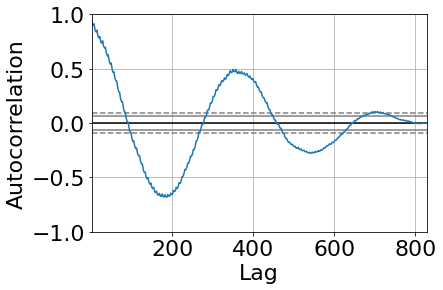

In [58]:
autocorrelation_plot(df2.avg_energy)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:           D.avg_energy   No. Observations:                  578
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -395.844
Method:                       css-mle   S.D. of innovations              0.479
Date:                Mon, 04 Jan 2021   AIC                            811.688
Time:                        16:04:45   BIC                            855.284
Sample:                             1   HQIC                           828.688
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0013      0.014      0.095      0.924      -0.026       0.029
ar.L1.D.avg_energy    -0.0717      0.088     -0.815      0.415      -0.244       0.101
ar.L2.D.avg_energy  

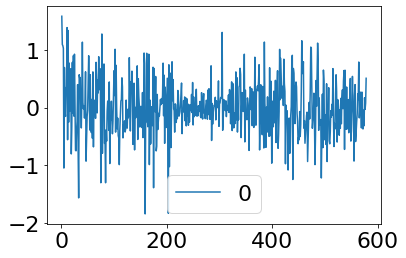

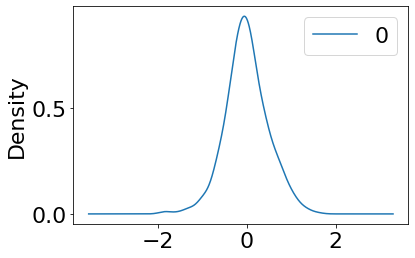

                0
count  578.000000
mean     0.002949
std      0.482884
min     -1.840592
25%     -0.284762
50%     -0.017060
75%      0.288432
max      1.582457
2.4419586658477783


In [60]:
start = time.time()
model = ARIMA(train, order=(7,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())
print(time.time()-start)

In [64]:
test.iloc[0]

8.573445527695492

In [65]:
start = time.time()
predictions = list()
history = train.values.tolist()
for t in range(len(test)):
	model = ARIMA(history, order=(7,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat[0])
	obs = test.iloc[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
print(time.time()-start)

predicted=8.800601, expected=8.573446
predicted=8.519867, expected=8.171690
predicted=8.138370, expected=8.178194
predicted=8.222788, expected=8.246932
predicted=8.244806, expected=8.444966
predicted=8.643123, expected=8.252049
predicted=8.584671, expected=8.605312
predicted=8.363340, expected=8.254716
predicted=8.065924, expected=8.405735
predicted=8.377279, expected=8.351101
predicted=8.357789, expected=8.169005
predicted=8.293332, expected=8.120987
predicted=8.102587, expected=8.141052
predicted=8.305201, expected=8.473993
predicted=8.330054, expected=8.107476
predicted=8.200442, expected=7.999090
predicted=8.035514, expected=7.992271
predicted=7.927446, expected=7.914739
predicted=7.933250, expected=7.953671
predicted=8.015473, expected=8.077354
predicted=8.225924, expected=8.476492
predicted=8.278253, expected=8.208424
predicted=8.127709, expected=8.165657
predicted=8.136204, expected=8.213160
predicted=8.123896, expected=8.145553
predicted=8.148953, expected=8.019665
predicted=8.

In [68]:
print(mean_absolute_error(test,predictions))
print(mean_absolute_percentage_error(test, predictions))

0.26695068096535013
2.5613424112858367


In [71]:
time_valid = np.arange(len(test))

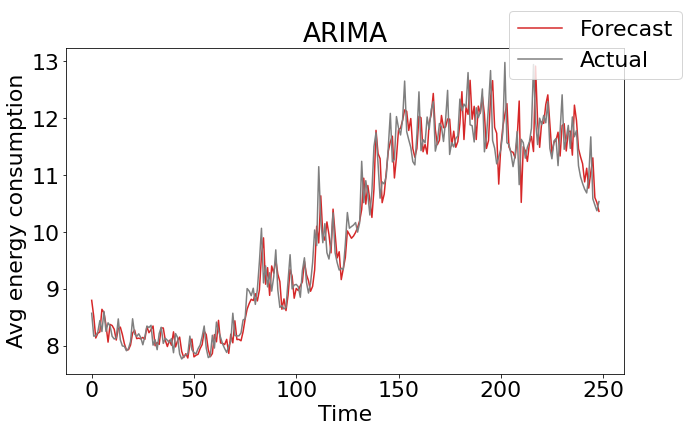

In [72]:
fig, ax1 = plt.subplots(figsize = (10,6))
ax1.plot(time_valid, predictions, color = "tab:red", label = "Forecast")
ax1.plot(time_valid, test, color = "tab:grey", label = "Actual")
#ax1.set_ylim([-5,80])
ax1.set_title("ARIMA")
ax1.set_ylabel("Avg energy consumption")
ax1.set_xlabel("Time")
fig.legend(loc="upper right")